In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
SEED = 0

In [32]:
data = np.load("pca_data.npz")["data"]
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data.shape)

(300, 2)


In [33]:
pca_sklearn = PCA()
pca_sklearn.fit(data)
print('\nPrincipal Components with scaled data:\n', pca_sklearn.components_)
print("\nPrincipal Component Explained variance ( eigen values ):")
print(pca_sklearn.explained_variance_)


Principal Components with scaled data:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Principal Component Explained variance ( eigen values ):
[1.69446527 0.31222369]


In [34]:
def PCA_custom(X,n_components):
    X_center = np.subtract(X, np.mean(X, axis=0))
    covariance_matrix = np.cov(X_center.T)
    eigenvalue,eigenvector = np.linalg.eig(covariance_matrix)
    #print(eigenvalue)
    sorted_indices = np.argsort(eigenvalue)[::-1][:n_components]
    pca_components = eigenvector[:,sorted_indices]
    return pca_components,eigenvalue

pca,explained_var = PCA_custom(data,2)
print("Principal Components with scaled data:")
print(pca)
print("Principal Component Explained variance ( eigen values ) :")
print(explained_var)

Principal Components with scaled data:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Principal Component Explained variance ( eigen values ) :
[1.69446527 0.31222369]


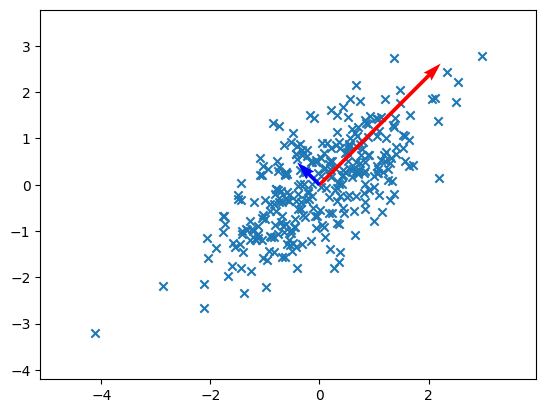

In [35]:
plt.scatter(data[:,0], data[:,1],marker = "x")
#plt.quiver(np.mean(data[:,0]), np.mean(data[:,1]), pca_sklearn.components_[0,0], pca_sklearn.components_[1,0], scale=0.5/pca_sklearn.explained_variance_[0],scale_units='xy', color='r')
#plt.quiver(np.mean(data[:,0]), np.mean(data[:,1]), pca_sklearn.components_[0,1], pca_sklearn.components_[1,1], scale=0.5/pca_sklearn.explained_variance_[1],scale_units='xy', color='b')
plt.quiver(np.mean(data[:,0]), np.mean(data[:,1]), pca[0,0], pca[1,0], scale=0.5/explained_var[0],scale_units='xy', color='r')
plt.quiver(np.mean(data[:,0]), np.mean(data[:,1]), pca[0,1], pca[1,1], scale=0.5/explained_var[1],scale_units='xy', color='b')
plt.xlim(min(data[:, 0])-1, max(data[:, 0])+1)
plt.ylim(min(data[:, 1])-1, max(data[:, 1])+1)
plt.show()